### This code is edited by Minhazul Islam Nannu and co editor is Tanbeer Jubaer

## `Simple`, `Compound` and `Complex` sentence detection using ML models.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentences/all_new.csv
/kaggle/input/sentences/output_alldata.csv
/kaggle/input/sentences/Bangla Transformation of Sentence Dataset(BTSD).xlsx


## Always Import Necessary tools here 

In [2]:

# Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
%matplotlib inline

from tqdm import tqdm


### IMPORT THE DATASET

In [3]:
data=pd.read_excel('/kaggle/input/sentences/Bangla Transformation of Sentence Dataset(BTSD).xlsx')
data.columns=['text','label']
data['num_label']=data['label'].replace({"Simple":0,"Complex":1,"Compound":2})

In [4]:
data.head(5)

,text,label,num_label
0,সন্ধ্যায় পাখিরা বাসায় ফেরে,Simple,0
1,সন্ধ্যা হয় এবং পাখিরা বাসায় ফেরে,Compound,2
2,যখন সন্ধ্যা হয় তখন পাখিরা বাসায় ফেরে,Complex,1
3,দর্শক মাত্রই আশ্চর্য হয়েছে,Simple,0
4,দেখেছে আর আশ্চর্য হয়েছে,Compound,2


In [5]:
#from datasets import load_dataset
#dataset = load_dataset('csv', data_files={'train':'/kaggle/input/simple3/train (2).csv',
                                            #  'test':'/kaggle/input/validation/test (2).csv'})

In [6]:
data.head(2)

,text,label,num_label
0,সন্ধ্যায় পাখিরা বাসায় ফেরে,Simple,0
1,সন্ধ্যা হয় এবং পাখিরা বাসায় ফেরে,Compound,2


In [7]:
level_df = pd.DataFrame({'label': [0, 1, 2],
                         'class':['সরল', 'জটিল', 'যৌগিক']})
level_df

,label,class
0,0,সরল
1,1,জটিল
2,2,যৌগিক


### CHANGE THE DATAFRAME

In [8]:
cus_data = data.copy()
cus_data.head(3)

,text,label,num_label
0,সন্ধ্যায় পাখিরা বাসায় ফেরে,Simple,0
1,সন্ধ্যা হয় এবং পাখিরা বাসায় ফেরে,Compound,2
2,যখন সন্ধ্যা হয় তখন পাখিরা বাসায় ফেরে,Complex,1


In [9]:

cus = pd.read_csv('/kaggle/input/sentences/all_new.csv')
cus.head(3)

,Label,Prediction,Corrected_Label,Text
0,2,1,1,"এ সংসারে যে কাজ দরকারি,তাতে আমার কোন হাত ছিল না।"
1,0,2,0,অসুস্থতা অবস্থায় সে স্কুলে গেল
2,2,1,1,যে অন্ধ তাকে আলো দাও


In [10]:
cor_label = cus.Corrected_Label
cor_text = cus.Text

In [11]:
pairs = [(a, b) for a, b in zip(cor_label, cor_text)]

In [12]:
pairs[0]

(1, 'এ সংসারে যে কাজ দরকারি,তাতে আমার কোন হাত ছিল না।')

In [13]:
cor_text[2]

'যে অন্ধ তাকে আলো দাও'

In [14]:
len(pairs)

141

In [15]:
i = 0
for index, row in cus_data.iterrows():
    if i==3:
        break
    i +=1
    print(row['text'][:30])

সন্ধ্যায় পাখিরা বাসায় ফেরে
সন্ধ্যা হয় এবং পাখিরা বাসায় ফে
যখন সন্ধ্যা হয় তখন পাখিরা বাসা


In [16]:
cus_data.num_label.value_counts()

0    1554
2    1196
1    1043
Name: num_label, dtype: int64

In [17]:
count = 0
for i in tqdm(range(len(pairs))):
    for index, row in cus_data.iterrows():
        if row['text'] == pairs[i][1]:
            count += 1
            cus_data.at[index, 'num_label'] = pairs[i][0]

100%|██████████| 141/141 [00:25<00:00,  5.42it/s]


In [18]:
print('Total Matched: ', count)

Total Matched:  141


In [19]:
cus_data.head(2)

,text,label,num_label
0,সন্ধ্যায় পাখিরা বাসায় ফেরে,Simple,0
1,সন্ধ্যা হয় এবং পাখিরা বাসায় ফেরে,Compound,2


In [20]:
cus_data.num_label.value_counts()

0    1536
2    1170
1    1087
Name: num_label, dtype: int64

In [21]:
main_data = data.copy()
data = cus_data.copy()

In [22]:
main_data.num_label.value_counts()

0    1554
2    1196
1    1043
Name: num_label, dtype: int64

In [23]:
data.num_label.value_counts()

0    1536
2    1170
1    1087
Name: num_label, dtype: int64

In [24]:
cheng = ['তিনি খুব তাড়াতাড়ি বিছানায় গিয়েছিলেন কারণ তার খুব ভোরের ফ্লাইট ছিল', 
         'তিনি তার ক্রিয়াকলাপের প্রভাব উপলব্ধি করার পরে প্রচুর পরিমাণে ক্ষমা চেয়েছিলেন',
         'তিনি ক্লাবে যোগ দিয়েছিলেন কারণ তিনি নতুন লোকের সাথে দেখা করতে চেয়েছিলেন',
         'একটি ওয়েবসাইট তৈরি করা হলে তখন অনেক কাজের মত মনে হয়' ,
         'বৃষ্টি হলে রাস্তা পিচ্ছিল হয়ে যায়।',
         'আমার কথা বিশ্বাস করো, তোমার মঙ্গল হবে'
]
chengl = [1, 0, 1, 0, 0, 2]
for i in range(5):
    vtc = cheng[i]
    if vtc in data['text'].values:
        data.loc[data['text'] == vtc, 'num_label'] = chengl[i]

value_to_check =  'ট্রয় একটি বিশাল কুকি খেয়েছে। তার পেটে ব্যথা হয়েছে'
if value_to_check in data['text'].values:
    data.loc[data['text'] == value_to_check, 'text'] = 'ট্রয় একটি বিশাল কুকি খেয়েছে, তার পেটে ব্যথা হয়েছে'

In [25]:
data.num_label.value_counts()

0    1537
2    1168
1    1088
Name: num_label, dtype: int64

### ENDED CHANGING THE DATAFRAME

In [26]:
from sklearn.model_selection import train_test_split 

np.random.seed(71)
train, temp = train_test_split(data, test_size=0.1)
valid, test = train_test_split(temp, test_size=.5)
len(train), len(test), len(valid)

(3413, 190, 190)

In [27]:
train.head(2)

,text,label,num_label
1740,সারাদিন বৃষ্টি হচ্ছিল যাইহোক তিনি পার্কে যাওয়...,Compound,2
2808,তিনি তার বন্ধুদের জন্য খাবার বানিয়েছেন,Simple,0


In [28]:
train.num_label.value_counts()

0    1391
2    1052
1     970
Name: num_label, dtype: int64

In [29]:
valid.head(2)

,text,label,num_label
1583,আমাকে বিরক্ত করার কারণটা জানতাম না।,Simple,0
2978,তারা বছরের পর বছর ধরে সঞ্চয় করার পরে একটি নতু...,Simple,0


In [30]:
valid.num_label.value_counts()

0    71
1    60
2    59
Name: num_label, dtype: int64

In [31]:
test.head(2)

,text,label,num_label
1810,যখন ঝড় কমে গেল তখন আমরা আমাদের যাত্রা অব্যাহত...,Complex,1
2238,তারা দুই বোন একটি কুকুর দেখে রাস্তা পার হল।,Simple,0


In [32]:
test.num_label.value_counts()

0    75
1    58
2    57
Name: num_label, dtype: int64

In [33]:
def plot_rate(df):
    df.label.value_counts().plot(kind='bar', cmap='viridis', title='Types of sentences');

In [34]:
# drop the label column
train = train.drop(['label'],axis=1)
valid = valid.drop(['label'],axis=1)
test = test.drop(['label'], axis=1)

In [35]:
# change column name numeric_label to label
train.rename(columns={'num_label': 'label'}, inplace=True)
valid.rename(columns={'num_label': 'label'}, inplace=True)
test.rename(columns={'num_label': 'label'}, inplace=True)

In [36]:
train.head(3)

,text,label
1740,সারাদিন বৃষ্টি হচ্ছিল যাইহোক তিনি পার্কে যাওয়...,2
2808,তিনি তার বন্ধুদের জন্য খাবার বানিয়েছেন,0
2119,যেহেতু পাখি আমাদের ছাড়া উড়তে পারে সেহেতু আমাদ...,1


In [37]:
valid.head(3)

,text,label
1583,আমাকে বিরক্ত করার কারণটা জানতাম না।,0
2978,তারা বছরের পর বছর ধরে সঞ্চয় করার পরে একটি নতু...,0
3024,আমি যখন তৈরি করেছি তখন আপনাকে পরে জানাব,1


In [38]:
test.head(3)

,text,label
1810,যখন ঝড় কমে গেল তখন আমরা আমাদের যাত্রা অব্যাহত...,1
2238,তারা দুই বোন একটি কুকুর দেখে রাস্তা পার হল।,0
2051,দেরি হয়ে গেছে তাই আমরা বাসায় চলে গেলাম,2


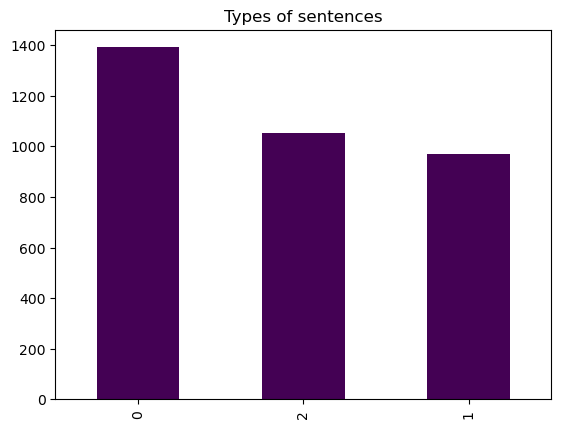

In [39]:
plot_rate(train)

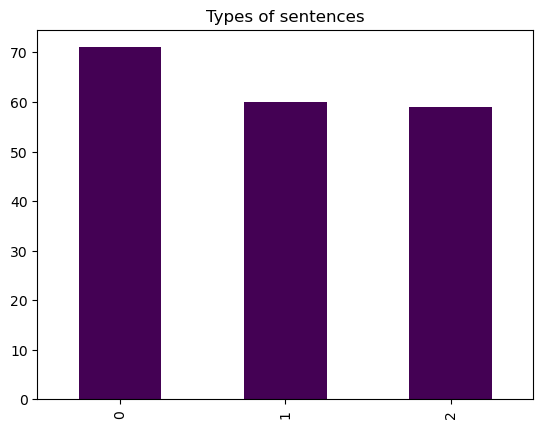

In [40]:
plot_rate(valid)

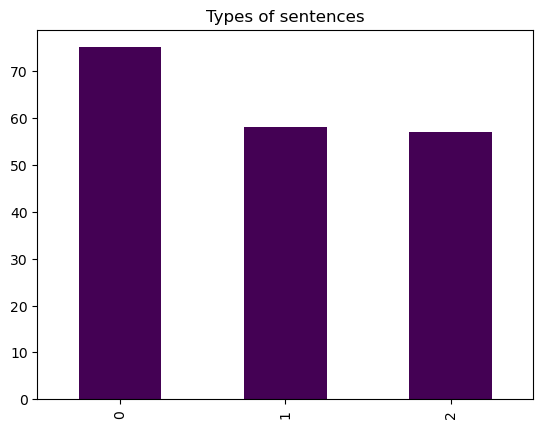

In [41]:
plot_rate(test)

In [42]:
# # drop the label column
# data2=data2.drop(['label'],axis=1)
# data3=data3.drop(['label'],axis=1)

In [43]:
# # change column name numeric_label to label
# data2.rename(columns={'num_label': 'label'}, inplace=True)
# data3.rename(columns={'num_label': 'label'}, inplace=True)

In [44]:
from datasets import Dataset,DatasetDict
dataset = DatasetDict({
    "train": Dataset.from_pandas(train),
    "validation": Dataset.from_pandas(valid)
    })

In [45]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', '__index_level_0__'],
        num_rows: 3413
    })
    validation: Dataset({
        features: ['text', 'label', '__index_level_0__'],
        num_rows: 190
    })
})

In [46]:
from transformers import BertTokenizer, TFBertModel,AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('sagorsarker/bangla-bert-base')

def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True,padding=True)

tokenized_data = dataset.map(preprocess_function, batched=True)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

  0%|          | 0/4 [00:00<?, ?ba/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


  0%|          | 0/1 [00:00<?, ?ba/s]

In [47]:
tokenized_data

DatasetDict({
    train: Dataset({
        features: ['text', 'label', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3413
    })
    validation: Dataset({
        features: ['text', 'label', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 190
    })
})

In [48]:
from transformers import DataCollatorWithPadding
#import evaluate
#accuracy=evaluate.load("accuracy")
data_collator=DataCollatorWithPadding(tokenizer=tokenizer,return_tensors='tf')

In [49]:
def compute_metrics(eval_pred):
    predictions,labels=eval_pred
    predictions=np.argmax(predictions,axis=1)
    return accuracy.compute(predictions=predictions,refernces=labels)

In [50]:
id2label = {0:0,1:1,2:2}
label2id = {0:0,1:1,2:2}

from transformers import create_optimizer
import tensorflow as tf
batch_size=16
num_epochs=2
batch_per_epoch=len(tokenized_data["train"])
total_train_steps=int(batch_per_epoch*num_epochs)
optimizer,schedule=create_optimizer(init_lr=2e-5,num_warmup_steps=0,num_train_steps=total_train_steps)

In [51]:
from transformers import TFAutoModelForSequenceClassification
model=TFAutoModelForSequenceClassification.from_pretrained(
    'sagorsarker/bangla-bert-base',num_labels=3,id2label=id2label,label2id=label2id,ignore_mismatched_sizes=True
    )

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [52]:
tf_train_set = model.prepare_tf_dataset(
    tokenized_data["train"],
    shuffle=True,
    batch_size=16,
    collate_fn=data_collator,
)


tf_validation_set = model.prepare_tf_dataset(
    tokenized_data["validation"],
    shuffle=False,
    batch_size=16,
    collate_fn=data_collator,
)

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


In [53]:
import tensorflow as tf

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])


In [54]:
model.config

BertConfig {
  "_name_or_path": "sagorsarker/bangla-bert-base",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": 0,
    "1": 1,
    "2": 2
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "0": 0,
    "1": 1,
    "2": 2
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.29.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 102025
}

In [55]:
history = model.fit(x=tf_train_set,validation_data=tf_validation_set, epochs=2)

Epoch 1/2
213/213 [==============================] - 102s 209ms/step - loss: 0.2500 - accuracy: 0.9131 - val_loss: 0.1022 - val_accuracy: 0.9632
Epoch 2/2
213/213 [==============================] - 32s 152ms/step - loss: 0.0712 - accuracy: 0.9795 - val_loss: 0.0762 - val_accuracy: 0.9684


In [56]:
# Get the training and validation accuracy from the history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_acc = [round(acc, 4) for acc in train_acc]
print(f'train = {train_acc}\n')
val_acc = [round(acc, 4) for acc in val_acc]
print(f'validation = {val_acc}')

train = [0.9131, 0.9795]

validation = [0.9632, 0.9684]


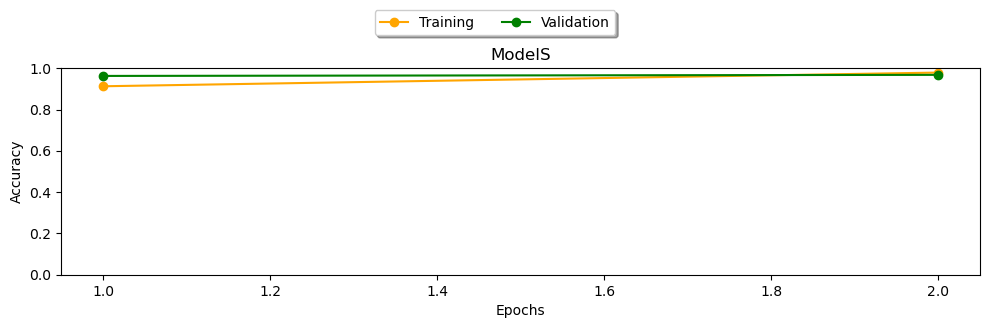

In [57]:

# # Example data
epochs = [i for i in range(1, num_epochs+1)]
#jk
train_loss_1 = train_acc
val_loss_1 = val_acc

# Create three subplots
fig, axes = plt.subplots(1, 1, figsize=(10, 3))

# Plot for Model 1
axes.plot(epochs, train_loss_1, label='Training Loss',color='orange', linestyle='-', 
             marker='o')
axes.plot(epochs, val_loss_1, label='Validation Loss', color='green', linestyle='-', 
             marker='o')
axes.set_xlabel('Epochs')
axes.set_ylabel('Accuracy')
axes.set_title('ModelS')
axes.set_ylim([0, 1])

# Add legend at the top
legend_labels = ['Training', 'Validation']
fig.legend(legend_labels, loc='upper center', 
           bbox_to_anchor=(0.5, 1.10), ncol=2, fancybox=True, shadow=True)



# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [58]:
import joblib

In [59]:
# Save the model to a file
joblib.dump(model, 'SentencTypeClassifier_0.pkl')
print("Model saved successfully.")

/opt/conda/lib/python3.10/site-packages/transformers/generation/tf_utils.py:465: UserWarning: `seed_generator` is deprecated and will be removed in a future version.
  warnings.warn("`seed_generator` is deprecated and will be removed in a future version.", UserWarning)


Model saved successfully.


In [60]:
def custom_test_up(text):
    inputs=tokenizer(text,return_tensors="tf")
    tf_outputs = model(inputs)                                  
    tf_predictions =np.argmax( tf.nn.softmax(tf_outputs[0], axis=-1) )
    return  tf_predictions

In [61]:
text="ট্রয় একটি বিশাল কুকি খেয়েছ"
inputs=tokenizer(text,return_tensors="tf")
tf_outputs = model(inputs)                                  
tf_predictions =np.argmax( tf.nn.softmax(tf_outputs[0], axis=-1) )
tf_predictions

0

In [62]:
tqdm.pandas()
test['pred']= test['text'].progress_apply(custom_test_up)

100%|██████████| 190/190 [00:36<00:00,  5.26it/s]


In [63]:
test.head(3)

,text,label,pred
1810,যখন ঝড় কমে গেল তখন আমরা আমাদের যাত্রা অব্যাহত...,1,1
2238,তারা দুই বোন একটি কুকুর দেখে রাস্তা পার হল।,0,0
2051,দেরি হয়ে গেছে তাই আমরা বাসায় চলে গেলাম,2,2


In [64]:
y_true = test['label'].values
y_pred = test['pred'].values

### Wrong predictions

In [65]:
print("Label\t","prediction\t","Text")
for i ,j ,k in zip(test['label'] , test['pred'],test['text']):
    if i!=j:
        print(i,"\t",j,"\t",k)

Label	 prediction	 Text
0 	 1 	 আমি আপনাকে আমার গাড়িটি ধার দেব যে আপনি এটির ভাল যত্ন নেবেন
2 	 1 	 আমরা খাই যাতে বাঁচতে পারি।
0 	 1 	 প্রচারটি আমার হওয়া স্বত্তেও আমার উপস্থিতি যতেষ্ট ভালো ছিলো না
1 	 2 	 আমার কথা বিশ্বাস করো, তোমার মঙ্গল হবে
2 	 1 	 যেহেতু আমি দেরি আসলাম এবং বস রাগান্বিত হলেন।


In [66]:
# cheng = ['তিনি খুব তাড়াতাড়ি বিছানায় গিয়েছিলেন কারণ তার খুব ভোরের ফ্লাইট ছিল', 
#          'তিনি তার ক্রিয়াকলাপের প্রভাব উপলব্ধি করার পরে প্রচুর পরিমাণে ক্ষমা চেয়েছিলেন',
#          'তিনি ক্লাবে যোগ দিয়েছিলেন কারণ তিনি নতুন লোকের সাথে দেখা করতে চেয়েছিলেন',
#          'একটি ওয়েবসাইট তৈরি করা হলে তখন অনেক কাজের মত মনে হয়' ,
#          'বৃষ্টি হলে রাস্তা পিচ্ছিল হয়ে যায়।']
# chengl = [1, 0, 1, 0, 0]
# for i in range(5):
#     vtc = cheng[i]
#     if vtc in data['text'].values:
#         data.loc[data['text'] == vtc, 'num_label'] = chengl[i]

In [67]:
# data['text'][data.index[data['text'] == cheng[1]]]
# data['num_label'][data.index[data['text'] == cheng[1]]]

In [68]:
# value_to_check =  'ট্রয় একটি বিশাল কুকি খেয়েছে। তার পেটে ব্যথা হয়েছে'
# if value_to_check in data['text'].values:
#     data.loc[data['text'] == value_to_check, 'text'] = 'ট্রয় একটি বিশাল কুকি খেয়েছে, তার পেটে ব্যথা হয়েছে'

In [69]:
# data.index[data['text'] == 'ট্রয় একটি বিশাল কুকি খেয়েছে। তার পেটে ব্যথা হয়েছে']

In [70]:
# data['text'][2075]

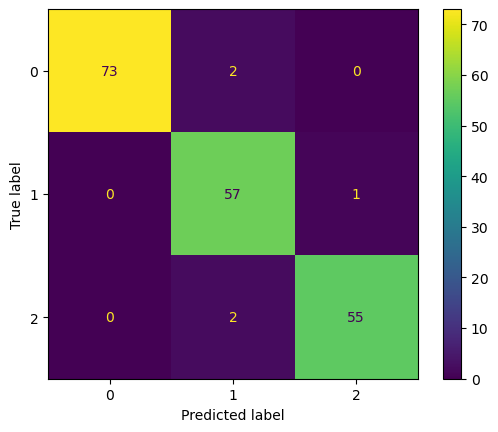

In [71]:
from sklearn import metrics
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_true, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2])

cm_display.plot()
plt.show()

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true,y_pred)

0.9736842105263158

### TETS ON CUSTOM DATASET

In [73]:
sentences = [
    'জসিম ভাত খায়।',
    "আমি বই পড়তে ভালোবাসি।",
    "আমার নাম সুরেশ।",
    "বাংলাদেশ একটি সুন্দর দেশ।",
    "আপনি কোথায় থাকেন?",
    "আমি একটি শিক্ষার্থী।",
    "আমার প্রিয় ফল আম।",
    "তুমি চেষ্টা না করায় ব্যর্থ হয়েছ।",
    "আমি আজ প্রিয় মানুষের সাথে ঘুম ভাঙ্গানোর স্বপ্ন দেখতে চাই।",
    "আমরা সবাই একটি মহান জাতির অংশ।",
    "আমরা দুটি বন্ধু সকালে পার্কে বেড়িয়ে যাচ্ছি।",
    "তার সাথে একটি আদর্শ সম্বন্ধ রয়েছে।",
    "আমরা একটি নতুন প্রকল্পে কাজ করছি।",
    "পরবর্তী সপ্তাহে আমরা দুটি পর্বে বিভাজিত হব।",
    "সকালে তিনটা পানি খাচ্ছি।",
    "বাড়ি ফিরে গিয়ে রাতে খাওয়া খাচ্ছি।",
    "আমি সবসময় নিরাপদে থাকতে চাই।",
    "এই বইটি আমার প্রিয় বই।",
    "আমাদের দেশে প্রকৃতি অত্যন্ত সুন্দর।",
    "আমি কখনও হঠাৎ সোনা উদ্ধার করতে চাই।",
    
    "যখন বিপদ আসে, তখন দুঃখও আসে।",
    "যদি নিয়মিত সাঁতার কাটো, তবে স্বাস্থ্য ভালো থাকবে।",
    "যারা পরিশ্রম করে, তারা জীবনে সফল হয়।",
    "যখন সে সুসংবাদটা পেল, তখন সে আনন্দিত হলো",
    "যে ছেলেটি এখানে এসেছিল, সে আমার ভাই।",
    "যদি তুমি যাও, তবে তার দেখা পাবে।",
    "যখন বৃষ্টি নামল, তখন আমরা ছাতা খুঁজতে শুরু করলাম।",
    "যেমনি বলল অমনি সে বাড়িমুখো রওনা দিল।",
    "যারা বিজ্ঞানী তাঁরা ভূত বিশ্বাস করেন না।",
    "যেহেতু দোষ করেছ, সেহেতু শান্তি পাবে।",
    "যদিও সে অসুস্থ তবুও সে স্কুলে গেল।",
    "সবাই জানেন যে, কালো টাকার মালিকগণ সুখী হন না।",
    "যদিও বর্ষাকাল তবুও মেঘের দেখা নেই।",
    "যেই বৃষ্টি এল সেই ব্যাঙের ডাক শুরু হল।",
    "যেহেতু সে পড়াশোনা করে সেহেতু সকলে তাকে ভালোবাসে।",
    "যদিও লোকটি সরল তথাপি সে জ্ঞানী।",
    "যে হিমালয়ে বাস করিতেন, সেই হিমালয়ের তিনি যেন মিতা।",
    "তোমার যিনি বাপ, তার নাম কি?",
    "যদিও ছেলেটির বয়স অল্প, তবু বেশ বুদ্ধিমান।",
    "আমি দেখা করব বলে আমি এসেছি",
    
    "আমি আসব, তুমি কাজ করবে।",
    "তোমরা চেষ্টা করেছ, কিন্তু আশানুরূপ ফল পাওনি – এতে দোষের কিছু নেই।",
    "সে ঘর ঝাড়ু দিল, ঘর মুছল, তারপর পড়তে বসল।",
    "আমরা খেললাম, তারপর গরম পানি খেয়েছি।",
    "নিয়মিত সাঁতার কাটো, স্বাস্থ্য ভালো থাকবে।",
    "সবাই হাসলে, সবাই খুশি।",
    "সীমা বই পড়ছে আর হাবিব ঘর গোছাচ্ছে।",
    "ছেলেটি গরিব কিন্তু মেধাবী।",
    "এতক্ষণ অপেক্ষা করলাম কিন্তু গাড়ি পেলাম না।",
    "দুঃখ এবং বিপদ এক সাথে আসে।",
    "এতক্ষণ অপেক্ষা করলাম কিন্তু গাড়ি পেলাম না।",
    "তাঁর টাকা আছে কিন্তু তিনি দান করেন না।",
    "ভোরে উঠবে এবং ভ্রমন করবে।",
    "বয়সে ছোট কিন্তু তার বুদ্ধি প্রখর।",
    "জোরে বলো নাহলে কেউ শুনতে পাবে না।",
    "স্টেশন এলাম আর ট্রেনটা ছেড়ে দিল।",
    "সূর্য ওঠে এবং কুয়াশা দূর হয়।",
    "সে পড়াশোনা করে, তাই সকলে তাকে ভালোবাসে।",
    "এখন রাত, তাই বাইরে যেও না।",
    "লোকটি সরল অথচ জ্ঞানী।"
]
true = np.repeat([0, 1, 2], 20)

In [74]:
true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

100%|██████████| 60/60 [00:11<00:00,  5.26it/s]


True = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 Prediction = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


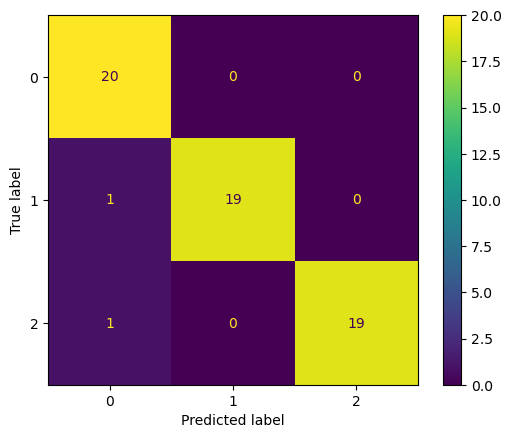

0.9666666666666667

In [75]:
# Check the results now
preds = []
for sent in tqdm(sentences):
    preds.append(custom_test_up(sent))

print(f'True = {true}\n Prediction = {preds}')

confusion_matrix = metrics.confusion_matrix(true, preds)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2])

cm_display.plot()
plt.show()
accuracy_score(true, preds)

In [76]:
cdata = {'Sentences':sentences,
        'Label':true,
        'Prediction':preds}
cdf = pd.DataFrame(cdata)
cdf.head()

,Sentences,Label,Prediction
0,জসিম ভাত খায়।,0,0
1,আমি বই পড়তে ভালোবাসি।,0,0
2,আমার নাম সুরেশ।,0,0
3,বাংলাদেশ একটি সুন্দর দেশ।,0,0
4,আপনি কোথায় থাকেন?,0,0


In [77]:
cdf.to_csv('/kaggle/working/Custom_dataset.csv', index=False)

## ROC Curve

In [78]:
def final(text):
    '''
    Implements our awsome algorithm and gives final output
    '''
    inputs=tokenizer(text,return_tensors="tf", truncation=True)
    x = []
    tf_outputs = model(inputs)                                  
    tf_predictions_final = tf.nn.softmax(tf_outputs[0], axis=-1)  
    x.append(tf_predictions_final.numpy().flatten())
    return x

In [79]:
test = test.reset_index(drop=True)

In [80]:
test.head(2)

,text,label,pred
0,যখন ঝড় কমে গেল তখন আমরা আমাদের যাত্রা অব্যাহত...,1,1
1,তারা দুই বোন একটি কুকুর দেখে রাস্তা পার হল।,0,0


In [81]:
final(test['text'][0])

[array([5.4046983e-04, 9.9861193e-01, 8.4758643e-04], dtype=float32)]

In [82]:
test_text = test['text']

In [83]:
test_text.head()

0    যখন ঝড় কমে গেল তখন আমরা আমাদের যাত্রা অব্যাহত...
1          তারা দুই বোন একটি কুকুর দেখে রাস্তা পার হল।
2             দেরি হয়ে গেছে তাই আমরা বাসায় চলে গেলাম
3          যদিও ভয়াল শব্দে বাজ পড়েছে তবুও এর বিরাম নেই
4                আমি আমার নতুন পোষা প্রাণীকে ভালোবাসি.
Name: text, dtype: object

In [84]:
predict = []
for text in tqdm(test_text):
    re = final(text)
    ans = []
    for val in re:
        for v in val:
            ans.append(v)
    np_array = np.array(ans)
    np_array = np_array.tolist()
    predict.append(np_array)

100%|██████████| 190/190 [00:36<00:00,  5.27it/s]


In [85]:
predict = np.array(predict)
predict[:10]

array([[5.40469831e-04, 9.98611927e-01, 8.47586431e-04],
       [9.98667359e-01, 5.07417368e-04, 8.25260999e-04],
       [7.55833113e-04, 1.13231631e-03, 9.98111844e-01],
       [6.42689294e-04, 9.98577237e-01, 7.80091912e-04],
       [9.97947037e-01, 1.59877376e-03, 4.54255118e-04],
       [4.46651014e-04, 6.10220130e-04, 9.98943150e-01],
       [7.53260800e-04, 9.98680651e-01, 5.66093309e-04],
       [6.54031697e-04, 9.98615026e-01, 7.30900909e-04],
       [4.41414129e-04, 9.96907358e-04, 9.98561680e-01],
       [9.81825471e-01, 2.56357598e-03, 1.56108858e-02]])

In [86]:
test.head(10)

,text,label,pred
0,যখন ঝড় কমে গেল তখন আমরা আমাদের যাত্রা অব্যাহত...,1,1
1,তারা দুই বোন একটি কুকুর দেখে রাস্তা পার হল।,0,0
2,দেরি হয়ে গেছে তাই আমরা বাসায় চলে গেলাম,2,2
3,যদিও ভয়াল শব্দে বাজ পড়েছে তবুও এর বিরাম নেই,1,1
4,আমি আমার নতুন পোষা প্রাণীকে ভালোবাসি.,0,0
5,তিনি প্রতিদিন গিটার অনুশীলন করেন এবং তিনি একজন...,2,2
6,যখন আবহাওয়া খুব খারাপ তখন আমরা বাড়ি যাইনি,1,1
7,"যদিও আপনি একটি শূকরের উপর ডানা লাগাতে পারেন, ত...",1,1
8,"সূর্য অস্ত যাচ্ছিল, তাই তারা সৈকতে হাঁটতে যাওয...",2,2
9,আমরা একটি বিখ্যাত historical তিহাসিক স্মৃতিস্ত...,0,0


In [87]:
true = test['label'].values
true = np.array(true)

In [88]:
true[:10]

array([1, 0, 2, 1, 0, 2, 1, 1, 2, 0])

In [89]:
true_b = true.copy()

In [90]:
for i in range(100):
    true_b[i] = 0

In [91]:
true_b[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

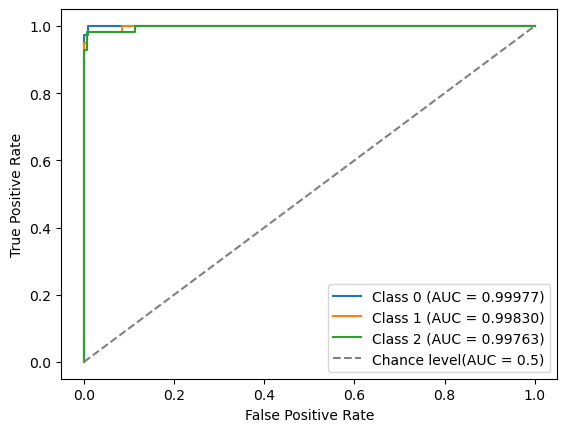

In [92]:
from sklearn.metrics import roc_curve, auc
# Calculate the ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(true == i, predict[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure()
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.5f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Chance level(AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Multi-Class ROC Curv')
plt.legend(loc='lower right')
plt.show()


## Now Classification Report

In [93]:
true[:14]

array([1, 0, 2, 1, 0, 2, 1, 1, 2, 0, 0, 0, 0, 2])

In [94]:
y_true[:14]

array([1, 0, 2, 1, 0, 2, 1, 1, 2, 0, 0, 0, 0, 2])

In [95]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred, output_dict=True)

cr_df = pd.DataFrame(report).transpose()
cr_df = cr_df.round(2)
cr_df

,precision,recall,f1-score,support
0,1.00,0.97,0.99,75.00
1,0.93,0.98,0.96,58.00
2,0.98,0.96,0.97,57.00
accuracy,0.97,0.97,0.97,0.97
macro avg,0.97,0.97,0.97,190.00
weighted avg,0.97,0.97,0.97,190.00


### ERROR CORRECTION

In [96]:
data.head(2)

,text,label,num_label
0,সন্ধ্যায় পাখিরা বাসায় ফেরে,Simple,0
1,সন্ধ্যা হয় এবং পাখিরা বাসায় ফেরে,Compound,2


In [97]:
# tqdm.pandas()
# data['pred']= data['text'].progress_apply(custom_test_up)

In [98]:
# y_true = data['num_label'].values
# y_pred = data['pred'].values

In [99]:
# confusion_matrix = metrics.confusion_matrix(y_true, y_pred)

# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2])

# cm_display.plot()
# plt.show()

In [100]:
accuracy_score(y_true,y_pred)

0.9736842105263158

In [101]:
data.head(2)

,text,label,num_label
0,সন্ধ্যায় পাখিরা বাসায় ফেরে,Simple,0
1,সন্ধ্যা হয় এবং পাখিরা বাসায় ফেরে,Compound,2


In [102]:
# list1 = []
# list2 = []
# list3 = []
# list4 = []
# print("Label\t","prediction\t","Text")
# index = 0
# for i ,j ,k in zip(data['num_label'] , data['pred'],data['text']):
#     if i!=j:
#         list1.append(i)
#         list2.append(j)
#         list3.append(k)
#         list4.append(index)
#     index += 1

# nc_data = {
#     'Index' : list4,
#     'Label' : list1,
#     'Prediction': list2,
#     'Text': list3
# }
# output = pd.DataFrame(nc_data)
# output.to_csv('/kaggle/working/output_alldata.csv', index=False, encoding='utf-8')

In [103]:
# output

In [104]:
# data['text'][87]